In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2
Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys, os
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

df=pd.read_csv('gdrive/My Drive/fer2013.csv')

# print(df.info())
# print(df["Usage"].value_counts())

# print(df.head())
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")


num_features = 64
num_labels = 7
batch_size = 64
epochs = 200
width, height = 48, 48


X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

#cannot produce
#normalizing data between oand 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

# print(f"shape:{X_train.shape}")
##designing the cnn
#1st convolution layer
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))

# model.summary()

#Compliling the model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

#Training the model
model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)

#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")




Train on 28709 samples, validate on 3589 samples
Epoch 1/200
28709/28709 [==============================] - 11s 369us/step - loss: 1.7274 - acc: 0.2937 - val_loss: 1.5473 - val_acc: 0.3862
Epoch 2/200
28709/28709 [==============================] - 9s 328us/step - loss: 1.5182 - acc: 0.4059 - val_loss: 1.4057 - val_acc: 0.4377
Epoch 3/200
28709/28709 [==============================] - 9s 330us/step - loss: 1.4109 - acc: 0.4553 - val_loss: 1.3337 - val_acc: 0.4806
Epoch 4/200
28709/28709 [==============================] - 9s 329us/step - loss: 1.3445 - acc: 0.4830 - val_loss: 1.2841 - val_acc: 0.4999
Epoch 5/200
28709/28709 [==============================] - 9s 330us/step - loss: 1.3077 - acc: 0.4946 - val_loss: 1.2569 - val_acc: 0.5121
Epoch 6/200
28709/28709 [==============================] - 10s 331us/step - loss: 1.2674 - acc: 0.5167 - val_loss: 1.2304 - val_acc: 0.5252
Epoch 7/200
28709/28709 [==============================] - 9s 330us/step - loss: 1.2401 - acc: 0.5230 - val_loss: 1

In [16]:
from sklearn.metrics import confusion_matrix

from keras.models import model_from_json

#load model
model = model_from_json(open("fer.json", "r").read())
#load weights
model.load_weights('fer.h5')

In [17]:
model

In [12]:
!conda list

# packages in environment at C:\Users\Asad Shah\anaconda3\envs\ai2_course:
#
# Name                    Version                   Build  Channel
_tflow_select             2.3.0                       mkl  
absl-py                   0.9.0                    py37_0  
astor                     0.8.0                    py37_0  
attrs                     19.3.0                     py_0  
backcall                  0.2.0                      py_0  
blas                      1.0                         mkl  
bleach                    3.1.5                      py_0  
brotlipy                  0.7.0           py37he774522_1000  
ca-certificates           2020.6.24                     0  
certifi                   2020.6.20                py37_0  
cffi                      1.14.0           py37h7a1dbc1_0  
chardet                   3.0.4                 py37_1003  
colorama                  0.4.3                      py_0  
cryptography              2.9.2            py37h7a1dbc1_0  
cycler        

In [18]:
import sys, os
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils

from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

df=pd.read_csv('fer2013.csv')

# print(df.info())
# print(df["Usage"].value_counts())

# print(df.head())
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")


num_features = 64
num_labels = 7
batch_size = 64
epochs = 200
width, height = 48, 48


X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

#cannot produce
#normalizing data between oand 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [4]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [19]:
predictions = model.predict(X_test)

In [20]:
predictions

array([[7.00546578e-02, 1.61568005e-05, 4.66560535e-02, ...,
        2.45145559e-01, 1.78876671e-03, 6.33371472e-01],
       [5.74271642e-02, 3.72881861e-03, 9.64388102e-02, ...,
        7.78241605e-02, 7.84971658e-03, 3.77681881e-01],
       [5.83500326e-01, 3.33702541e-03, 9.06264037e-02, ...,
        1.63841635e-01, 5.08005731e-03, 1.52195394e-01],
       ...,
       [1.52756825e-01, 1.59266303e-04, 1.61033645e-01, ...,
        1.80201769e-01, 1.17441326e-04, 3.21367264e-01],
       [6.15554154e-01, 3.63669451e-03, 1.17884405e-01, ...,
        1.47408798e-01, 2.68107257e-03, 1.03609614e-01],
       [1.78897321e-01, 1.50884691e-04, 8.68678242e-02, ...,
        2.11063579e-01, 7.68485153e-03, 4.99902636e-01]], dtype=float32)

In [21]:
y_pred = (predictions > 0.5)

In [22]:
cm = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))

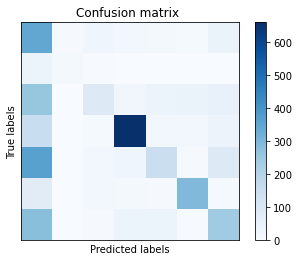

In [23]:
import matplotlib.pyplot as plt

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [24]:
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[350   6  26  20  14   9  42]
 [ 34  15   4   2   0   0   1]
 [260   2  83  22  36  43  50]
 [153   0  10 661  18  16  37]
 [367   2  17  27 149   6  85]
 [ 74   0  16  14   7 295   9]
 [280   1   6  41  34   3 242]]
Confusion matrix, without normalization
[[350   6  26  20  14   9  42]
 [ 34  15   4   2   0   0   1]
 [260   2  83  22  36  43  50]
 [153   0  10 661  18  16  37]
 [367   2  17  27 149   6  85]
 [ 74   0  16  14   7 295   9]
 [280   1   6  41  34   3 242]]
Confusion matrix, without normalization
[[350   6  26  20  14   9  42]
 [ 34  15   4   2   0   0   1]
 [260   2  83  22  36  43  50]
 [153   0  10 661  18  16  37]
 [367   2  17  27 149   6  85]
 [ 74   0  16  14   7 295   9]
 [280   1   6  41  34   3 242]]
Confusion matrix, without normalization
[[350   6  26  20  14   9  42]
 [ 34  15   4   2   0   0   1]
 [260   2  83  22  36  43  50]
 [153   0  10 661  18  16  37]
 [367   2  17  27 149   6  85]
 [ 74   0  16  14   7 295   9]


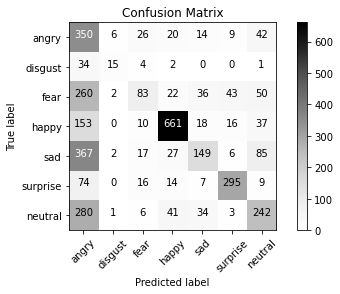

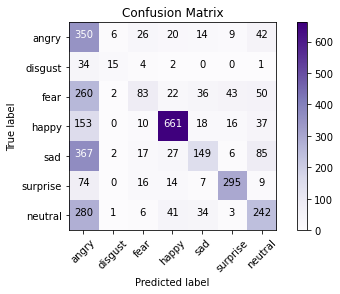

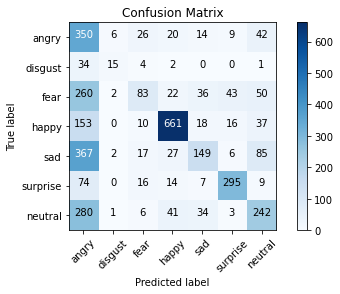

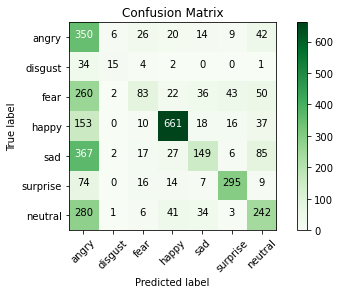

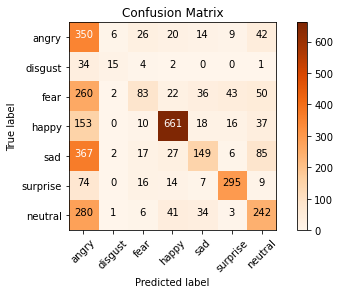

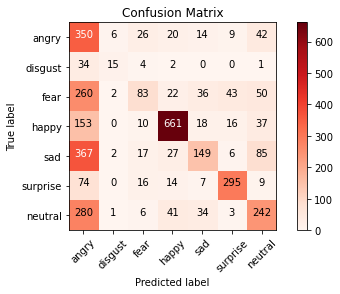

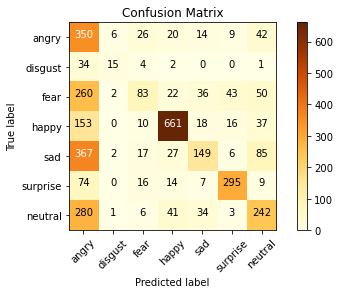

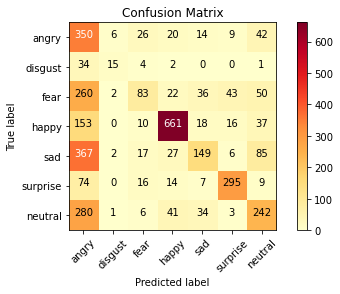

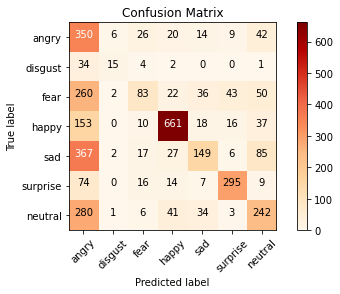

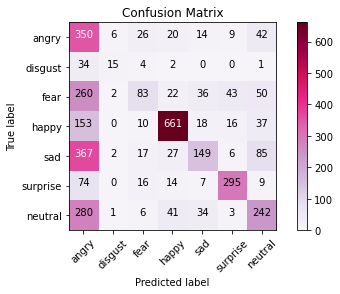

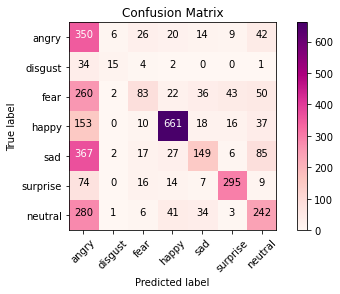

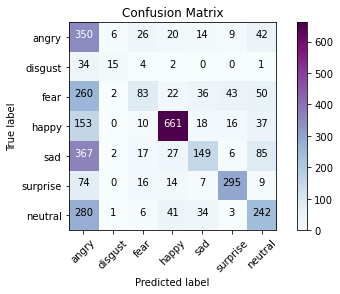

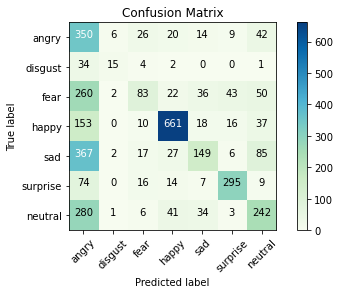

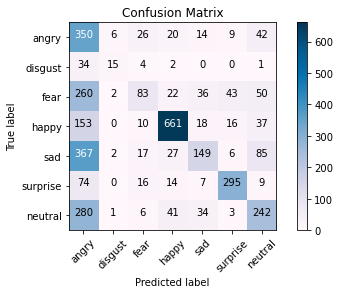

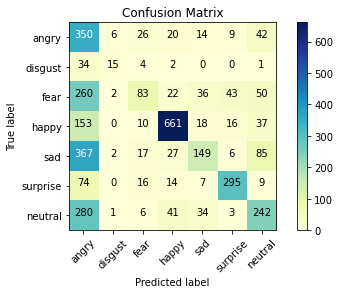

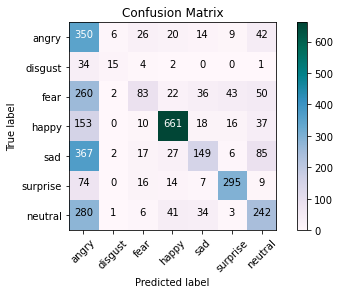

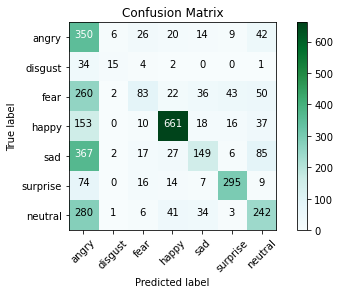

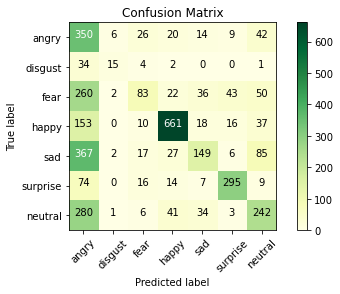

In [25]:
cm_plot_labels = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
list = [plt.cm.Greys, plt.cm.Purples, plt.cm.Blues, plt.cm.Greens, plt.cm.Oranges, plt.cm.Reds,
            plt.cm.YlOrBr, plt.cm.YlOrRd, plt.cm.OrRd, plt.cm.PuRd, plt.cm.RdPu, plt.cm.BuPu,
            plt.cm.GnBu, plt.cm.PuBu, plt.cm.YlGnBu, plt.cm.PuBuGn, plt.cm.BuGn, plt.cm.YlGn]

for color in list:
    plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix', cmap=color)

In [26]:
cm

array([[350,   6,  26,  20,  14,   9,  42],
       [ 34,  15,   4,   2,   0,   0,   1],
       [260,   2,  83,  22,  36,  43,  50],
       [153,   0,  10, 661,  18,  16,  37],
       [367,   2,  17,  27, 149,   6,  85],
       [ 74,   0,  16,  14,   7, 295,   9],
       [280,   1,   6,  41,  34,   3, 242]], dtype=int64)

In [27]:
cm.ravel()

array([350,   6,  26,  20,  14,   9,  42,  34,  15,   4,   2,   0,   0,
         1, 260,   2,  83,  22,  36,  43,  50, 153,   0,  10, 661,  18,
        16,  37, 367,   2,  17,  27, 149,   6,  85,  74,   0,  16,  14,
         7, 295,   9, 280,   1,   6,  41,  34,   3, 242], dtype=int64)

In [28]:
model

In [29]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(test_y, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.36


In [30]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(test_y, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      accuracy_score))

Average precision-recall score: 0.44
